In [1]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 260.3 kB/s eta 0:00:00a 0:00:01
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 37.9 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl (5.0 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (1.5 MB)
   ━━━━

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from load_data import DontPatronizeMe

pd.set_option('display.width',1000)

DATA_DIR = 'data/'
OUTPUT_DIR = 'eda/'

In [ ]:
dpm = DontPatronizeMe(DATA_DIR, None)

dpm.load_task1()
    
df = pd.read_csv(f"{DATA_DIR}train_semeval_parids-labels.csv")
df.head()
df["par_id"] = df["par_id"].astype(str)

# Select rows from dpm.train_task_df according to training split
df = df.merge(dpm.train_task1_df, on='par_id', how='left')

df.head()

,par_id,label_x,art_id,keyword,country,text,label_y,orig_label
0,4341,"[1, 0, 0, 1, 0, 0, 0]",@@17139403,poor-families,gb,"The scheme saw an estimated 150,000 children f...",1,4
1,4136,"[0, 1, 0, 0, 0, 0, 0]",@@22273328,homeless,za,Durban 's homeless communities reconciliation ...,1,2
2,10352,"[1, 0, 0, 0, 0, 1, 0]",@@21102155,poor-families,lk,The next immediate problem that cropped up was...,1,4
3,8279,"[0, 0, 0, 1, 0, 0, 0]",@@21220476,vulnerable,nz,Far more important than the implications for t...,1,2
4,1164,"[1, 0, 0, 1, 1, 1, 0]",@@14727121,poor-families,gh,To strengthen child-sensitive social protectio...,1,4


Average sentence length: 48.68
Minimum sentence length: 1
Maximum sentence length: 909
95th percentile of sentence lengths: 102.0
99th percentile of sentence lengths: 142.0


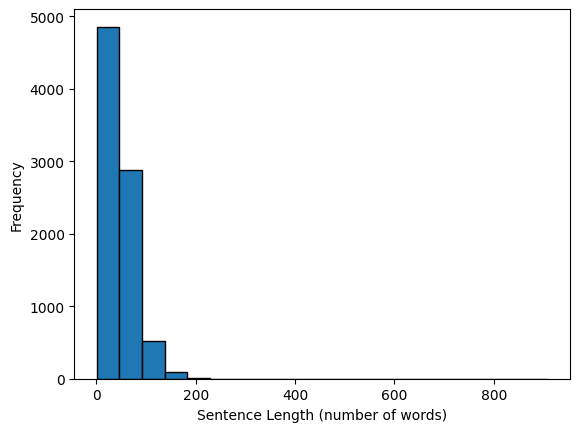

In [14]:
# average, min and max sentence length
df['text_length'] = df['text'].dropna().apply(lambda x: len(x.split()))

avg_length = df['text_length'].mean()
min_length = df['text_length'].min()
max_length = df['text_length'].max()


print(f"Average sentence length: {avg_length:.2f}")
print(f"Minimum sentence length: {min_length}")
print(f"Maximum sentence length: {max_length}")

# 95th percentile of sentence lengths
percentile_95 = df['text_length'].quantile(0.95)
print(f"95th percentile of sentence lengths: {percentile_95}")

# 99th percentile of sentence lengths
percentile_99 = df['text_length'].quantile(0.99)
print(f"99th percentile of sentence lengths: {percentile_99}")

# Histogram of sentence lengths
plt.hist(df['text_length'], bins=20, edgecolor='black')
plt.xlabel('Sentence Length (number of words)')
plt.ylabel('Frequency')
plt.savefig(f'{OUTPUT_DIR}sent_len_dist.png')
plt.show()


Label distribution:
label_y
0    7581
1     794
Name: count, dtype: int64

Label distribution (percentages):
label_y
0    90.519403
1     9.480597
Name: proportion, dtype: float64


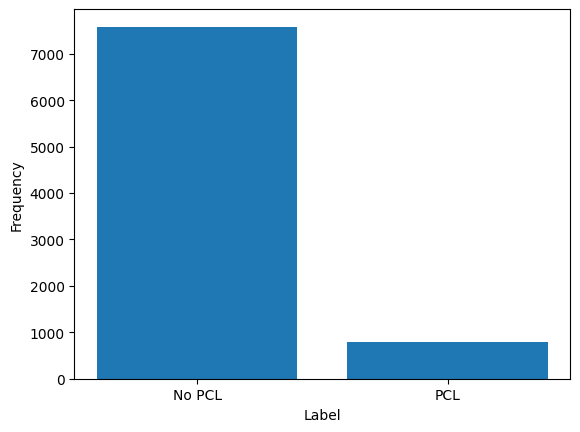

In [15]:
# distribution of labels
label_counts = df['label_y'].value_counts()
print("Label distribution:")
print(label_counts)
print()

# distribution of labels as percentages
label_percentages = df['label_y'].value_counts(normalize=True) * 100
print("Label distribution (percentages):")
print(label_percentages)

# Bar plot of label distribution
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(label_counts.index, ['No PCL', 'PCL'])
plt.savefig(f'{OUTPUT_DIR}class_dist.png')
plt.show()


In [6]:
# vocabulary size
all_words = ' '.join(df['text'].dropna()).split()
vocab = set(all_words)
print(f"Vocabulary size: {len(vocab)}")

Vocabulary size: 33482


In [7]:
# - Stop Word Density: How much of the text is "filler" (the, is, at)? High
# density might mean you need more aggressive cleaning.
# - Word Clouds & Frequency: A quick visual check to see if the most
# frequent words actually align with the task.

STOP_WORDS = {'the', 'is', 'in', 'and', 'to', 'a', 'of', 'that', 'it', 'on', 'for', 'as', 'with', 'was', 'at', 'by', 'an'}

def stop_word_density(words):
    if len(words) == 0:
        return 0
    stop_word_count = sum(1 for word in words if word.lower() in STOP_WORDS)
    return stop_word_count / len(words)

print(f"Stop Word Density: {stop_word_density(all_words):.4f}")

Stop Word Density: 0.2380


In [8]:
# - N-gram Analysis: What are the most common pairs (bigrams) or triplets
# (trigrams) of words? This reveals common phrases or domain-specific
# jargon.
from collections import defaultdict

bi_counts = defaultdict(int)
tri_counts = defaultdict(int)

three_ago = all_words[0]
two_ago = all_words[1]
one_ago = all_words[2]

bi_counts[(three_ago, two_ago)] += 1
bi_counts[(two_ago, one_ago)] += 1
tri_counts[(three_ago, two_ago, one_ago)] += 1

for word in all_words[3:]:
    three_ago, two_ago, one_ago = two_ago, one_ago, word

    bi_counts[((two_ago, one_ago))] += 1
    tri_counts[(three_ago, two_ago, one_ago)] += 1

bi_common = sorted(bi_counts.items(), key=lambda kv: kv[1], reverse=True)
tri_common = sorted(tri_counts.items(), key=lambda kv: kv[1], reverse=True)

print(bi_common[:5])
print(tri_common[:5])

[(('of', 'the'), 2126), (('in', 'the'), 1850), (('.', 'The'), 1478), (('.', '"""'), 1172), ((',', 'the'), 1161)]
[(('in', 'need', 'of'), 464), ((',', '""', 'he'), 186), (('from', 'poor', 'families'), 176), ((',', '""', 'said'), 148), (('.', '"""', 'The'), 145)]
